<a href="https://colab.research.google.com/github/kaouther4habib/Deep-Autoencoder-based-Clustering-of-Histopathological-Images/blob/master/PFE_DENOIS_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up the env**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from keras.models import Sequential
!pip install umap-learn
!pip install umap-learn[plot]
!pip install hdbscan
!pip install seaborn
!pip install streamlit
from tensorflow.keras.datasets import fashion_mnist
# !pip install pyngrok
import hdbscan
import pickle
import seaborn as sns
from keras.layers import Dense, Activation, Flatten, Input
from keras.models import Model
from keras import backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 29.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1cd0e5e2b4e8bde99cd64335ed5c178ee5777cd86e4788a9dd969ae740d79aad
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=31eccbcb4b93ed0cf4773c25e290419e217bb97e58578c6212e917f0e7a279e4
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 20.4 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342136 sha256=f680d3eea531988a50caf1cd11cac42830913a0b7a783562b409ea8b48e4f4b6
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 4.3 MB/s 
     |████████████████████████████████| 111 kB 48.4 MB/s 
     |████████████████████████████████| 181 kB 45.5 MB/s 
     |████████████████████████████████| 78 kB 8

# **Loading data from drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#from fastai.datasets import datapath4file
# Change the working directory
%cd /content/drive/MyDrive/data/datahisto/


Mounted at /content/drive
/content/drive/MyDrive/data/datahisto


In [ ]:
#%cd /content/drive/Shareddrives/data/datahisto

%cd /content/drive/MyDrive/data/datahisto

/content/drive/MyDrive/data/datahisto


In [ ]:
from glob import glob

# PATH_OF_DATA= '/content/drive/MyDrive/datahis2/8863/0'
imagePatches = glob('/content/drive/MyDrive/data/datahisto/**/**/*.png', recursive=True)

In [ ]:
k= len(imagePatches)
print(k)

19422


# **Preparing the data**

In [ ]:
import cv2
import matplotlib.pyplot as plt
def __showImages__(imagePatches):
     img=cv2.imread(i)
     img_1=cv2.resize(img,(96,96))
    #  img_2=cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
     plt.imshow(img_1,cmap='binary')
     plt.show()



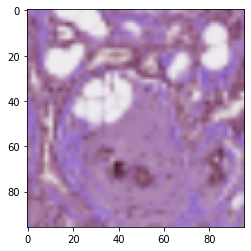

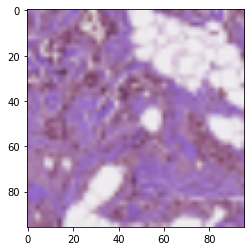

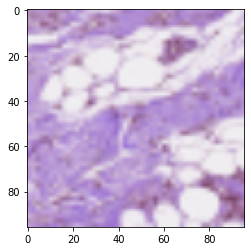

In [ ]:
for i in imagePatches[:3]:
   __showImages__(i)

# **Preparing the data**

In [ ]:
from PIL import Image
images=[]
labels=[]
for i in imagePatches[:'4000']:
       if i.endswith('.png'):
         label=i[-5]
         img=cv2.imread(i)
         img_1=cv2.resize(img,(96,96))
         images.append(img_1)
         labels.append(label)


In [ ]:

from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)
print(y.shape)



In [ ]:
x=np.stack(images)


Convert images to gray scale

In [ ]:
true_label= y.ravel()
print(true_label.shape)

true_label2 = np.resize(true_label,3800)
print(true_label2.shape)


In [ ]:
from skimage import data
from skimage.color import rgb2gray
X_train_grayscale = np.zeros(x.shape[:-1])
for i in range(x.shape[0]): 
     X_train_grayscale[i] = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY) 


# **Split data to train and test**

In [ ]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(X_train_grayscale,y,random_state=0,test_size=0.2)


 x_train = x_train.astype('float32') /255.
 x_test = x_test.astype('float32') / 255.
 y_train = y_train.astype('float32')/255.
 y_test = y_test.astype('float32')/255.
 

 print(x_train.shape)
 print(x_test.shape)
 print(y_train.shape)
 print(y_test.shape)


# **Adding the noise**

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

# **Building Denoising AE**

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(96, 96, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

In [ ]:
autoencoder.encoder.summary()

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import umap.umap_ as umap
# import umap.plot

def learn_manifold(x_data, umap_min_dist=0.00, umap_metric='euclidean', umap_dim=10, umap_neighbors=30):
    md = float(umap_min_dist)
    return umap.UMAP(
        random_state=0,
        metric=umap_metric,
        n_components=umap_dim,
        n_neighbors=umap_neighbors,
        min_dist=md).fit_transform(x_data)

In [ ]:
print(x_test.shape)
print(encoded_imgs.shape)


In [ ]:
encoded_dimensions = 10
nsamples, nx, ny, nz = encoded_imgs.shape
X_encoded = encoded_imgs.reshape((nsamples,nx*ny*nz))
X_reduced = learn_manifold(X_encoded, umap_neighbors=30, umap_dim=int(encoded_dimensions/2))

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(X_reduced)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
k_encoded = KMeans(3).fit(X_reduced)
encoded_clustered = k_encoded.predict(X_reduced)


In [ ]:
u_labels = np.unique(encoded_clustered)
print(u_labels)
#plotting the results:
for i in u_labels:
   plt.scatter(X_reduced[encoded_clustered==i,0], X_reduced[encoded_clustered==i,1], s=80)

# **Evaluation measures for K-means**

Silhouette measure for kmeans

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

score = silhouette_score(X_reduced, k_encoded.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Visualising the silhouette score

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

clf = KMeans(n_clusters=3)
vzr = SilhouetteVisualizer(clf)
vzr.fit(X_reduced)
vzr.poof()

**Davis Bouldin measure**

In [ ]:
from sklearn.metrics import davies_bouldin_score


db_index = davies_bouldin_score(X_reduced, k_encoded.labels_)
print(db_index)

# **Hierarchical Clustering**

Implementing the algorithm

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_reduced)
print(cluster.labels_)

n_clusters_ = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
print(n_clusters_)

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=k_encoded.labels_, cmap='rainbow')

# **DBSCAN Clusterig**

Implementing the algorirthm

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

clustering = DBSCAN(eps=1, min_samples=3).fit(X_reduced)
#Storing the labels formed by the DBSCAN
labels = clustering.labels_
print(labels)

plt.scatter(X_reduced[:, 0], X_reduced[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot

# n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
# print(n_clusters_)

# **HDBSCAN CLUSTERING**

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50,prediction_data=True).fit(X_reduced)
  
h_labels = np.unique(clusterer)
print(h_labels)

#Plotting the results
pal = sns.color_palette('deep', 9)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(X_reduced.T[0], X_reduced.T[1], c=colors);


n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
print(n_clusters_)

# **Mean shift clustering**

In [ ]:
from sklearn.cluster import MeanShift,estimate_bandwidth

bandwidth = estimate_bandwidth(X_reduced, quantile=0.2, n_samples=10000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model = ms.fit(X_reduced)
cluster_centers = ms.cluster_centers_


fig = plt.figure()
  

#Plotting the results
pal = sns.color_palette('deep', 10)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(X_reduced.T[0], X_reduced.T[1], c=colors);
n_clusters_ = len(set(k_encoded.labels_)) - (1 if -1 in k_encoded.labels_ else 0)

print('Number of clusters is: '+str(n_clusters_))

In [ ]:
## save model
filepath = "/content/drive/MyDrive/data/datahisto/model_denoising_ae.pb"
tf.keras.models.save_model(
    autoencoder,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True
)

